Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

Loading data

In [6]:
attrition = pd.read_csv('attrition.csv')
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
target = pd.read_csv('test_target.csv')

Data check

In [7]:
# Checking the basic information for "attition"
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   EmployeeNumber  4449 non-null   int64 
 1   Attrition       4302 non-null   object
dtypes: int64(1), object(1)
memory usage: 69.6+ KB


In [770]:
# Checking if data in "df2" contains null value
df2.isnull().sum()

EmployeeNumber                0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Attrition                   147
YearlyIncome                  0
dtype: int64

In [8]:
# Checking basic informations for data in "df2"
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Over18                    4449 non-null   object 
 2   OverTime                  4449 non-null   object 
 3   PercentSalaryHike         4449 non-null   float64
 4   PerformanceRating         4449 non-null   float64
 5   RelationshipSatisfaction  4449 non-null   float64
 6   StandardHours             4449 non-null   float64
 7   StockOptionLevel          4449 non-null   float64
 8   TotalWorkingYears         4449 non-null   float64
 9   TrainingTimesLastYear     4449 non-null   float64
 10  WorkLifeBalance           4449 non-null   float64
 11  YearsAtCompany            4449 non-null   float64
 12  YearsInCurrentRole        4449 non-null   float64
 13  YearsSinceLastPromotion   4449 non-null   float64
 14  YearsWit

EDA

In [9]:
# Cration of new dataframe "data" by merging files: df1 and df2
data = df1.merge(df2)

In [10]:
# Checking basic informations for data in "data"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Age                       4449 non-null   float64
 2   BusinessTravel            4449 non-null   object 
 3   DailyRate                 4449 non-null   float64
 4   Department                4449 non-null   object 
 5   DistanceFromHome          4449 non-null   float64
 6   Education                 4449 non-null   float64
 7   EducationField            4449 non-null   object 
 8   EmployeeCount             4449 non-null   float64
 9   EnvironmentSatisfaction   4449 non-null   float64
 10  Gender                    4449 non-null   object 
 11  HourlyRate                4449 non-null   float64
 12  JobInvolvement            4449 non-null   float64
 13  JobLevel                  4449 non-null   float64
 14  JobRole 

In [774]:
data.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,...,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,...,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,...,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [775]:
# CSV jako archiwum, dane z df1.csv + df2.csv
data.to_csv('data.csv')

In [776]:
# Stworzenie ramki danych bez zestawu danych do testu(X_test)
train_df = data.loc[data['Attrition'].notnull()]

# Ramka danych do testu
X_test = data.loc[data['Attrition'].isnull()]

In [777]:
train_df

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,...,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,...,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,...,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,...,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,...,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,...,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,...,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [778]:
train_df.isna().sum()

EmployeeNumber              0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [779]:
print(train_df[train_df['NumCompaniesWorked'] == 0])

      EmployeeNumber   Age     BusinessTravel  DailyRate   
7                351  42.0      Travel_Rarely      269.0  \
8                555  34.0  Travel_Frequently      296.0   
13               724  38.0      Travel_Rarely      827.0   
14              1671  32.0      Travel_Rarely      977.0   
16              1778  43.0      Travel_Rarely      244.0   
...              ...   ...                ...        ...   
4410            7941  33.0      Travel_Rarely      213.0   
4411            7942  33.0      Travel_Rarely      213.0   
4412            7943  33.0      Travel_Rarely      213.0   
4438            7969  41.0      Travel_Rarely      582.0   
4439            7970  41.0      Travel_Rarely      582.0   

                  Department  DistanceFromHome  Education EducationField   
7     Research & Development               2.0        3.0        Medical  \
8                      Sales               6.0        2.0      Marketing   
13    Research & Development               1.0     

In [780]:
train_df['YearsAtCompany'].describe()

count    4302.000000
mean      312.854719
std      1373.999529
min         0.000000
25%         3.000000
50%         5.000000
75%        10.000000
max      9984.000000
Name: YearsAtCompany, dtype: float64

In [781]:
print(train_df[train_df['YearsAtCompany'] > 30])

      EmployeeNumber   Age     BusinessTravel  DailyRate   
92               374  55.0      Travel_Rarely      452.0  \
353              131  58.0      Travel_Rarely      682.0   
356              259  52.0      Travel_Rarely      699.0   
361              165  58.0      Travel_Rarely      147.0   
382             1572  53.0      Travel_Rarely      607.0   
...              ...   ...                ...        ...   
4369            7900  33.0      Travel_Rarely     1242.0   
4370            7901  33.0      Travel_Rarely     1242.0   
4405            7936  38.0  Travel_Frequently      148.0   
4433            7964  37.0      Travel_Rarely      921.0   
4434            7965  37.0      Travel_Rarely      921.0   

                  Department  DistanceFromHome  Education    EducationField   
92    Research & Development               1.0        3.0           Medical  \
353                    Sales              10.0        4.0           Medical   
356   Research & Development              

In [782]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4302 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   Age                       4302 non-null   float64
 2   BusinessTravel            4302 non-null   object 
 3   DailyRate                 4302 non-null   float64
 4   Department                4302 non-null   object 
 5   DistanceFromHome          4302 non-null   float64
 6   Education                 4302 non-null   float64
 7   EducationField            4302 non-null   object 
 8   EmployeeCount             4302 non-null   float64
 9   EnvironmentSatisfaction   4302 non-null   float64
 10  Gender                    4302 non-null   object 
 11  HourlyRate                4302 non-null   float64
 12  JobInvolvement            4302 non-null   float64
 13  JobLevel                  4302 non-null   float64
 14  JobRole      

In [783]:
def visualize_column_counts_per_class(column_name):
    count = train_df.groupby(['Attrition'])[column_name].value_counts().unstack()
    percentage = train_df.pivot_table(columns=column_name, index='Attrition', values='EmployeeNumber', aggfunc='count')
    percentage = percentage.div(percentage.sum(axis=1), axis=0).round(2)

    # Plotting count chart
    fig, ax = plt.subplots(1, 2)
    count.plot(kind='bar', ax=ax[0], figsize=(15, 5))

    # Plotting percentage chart
    percentage.plot(kind='bar', ax=ax[1], figsize=(15, 5), stacked=True)

In [784]:
def corr_with_heatmap(data_frame):
    plt.figure(figsize=(20,15))
    sns.set_theme(style="white")
    cor = data_frame.corr(numeric_only=True)
    sns.heatmap(cor, annot=True, cmap="Blues", fmt='.1g')

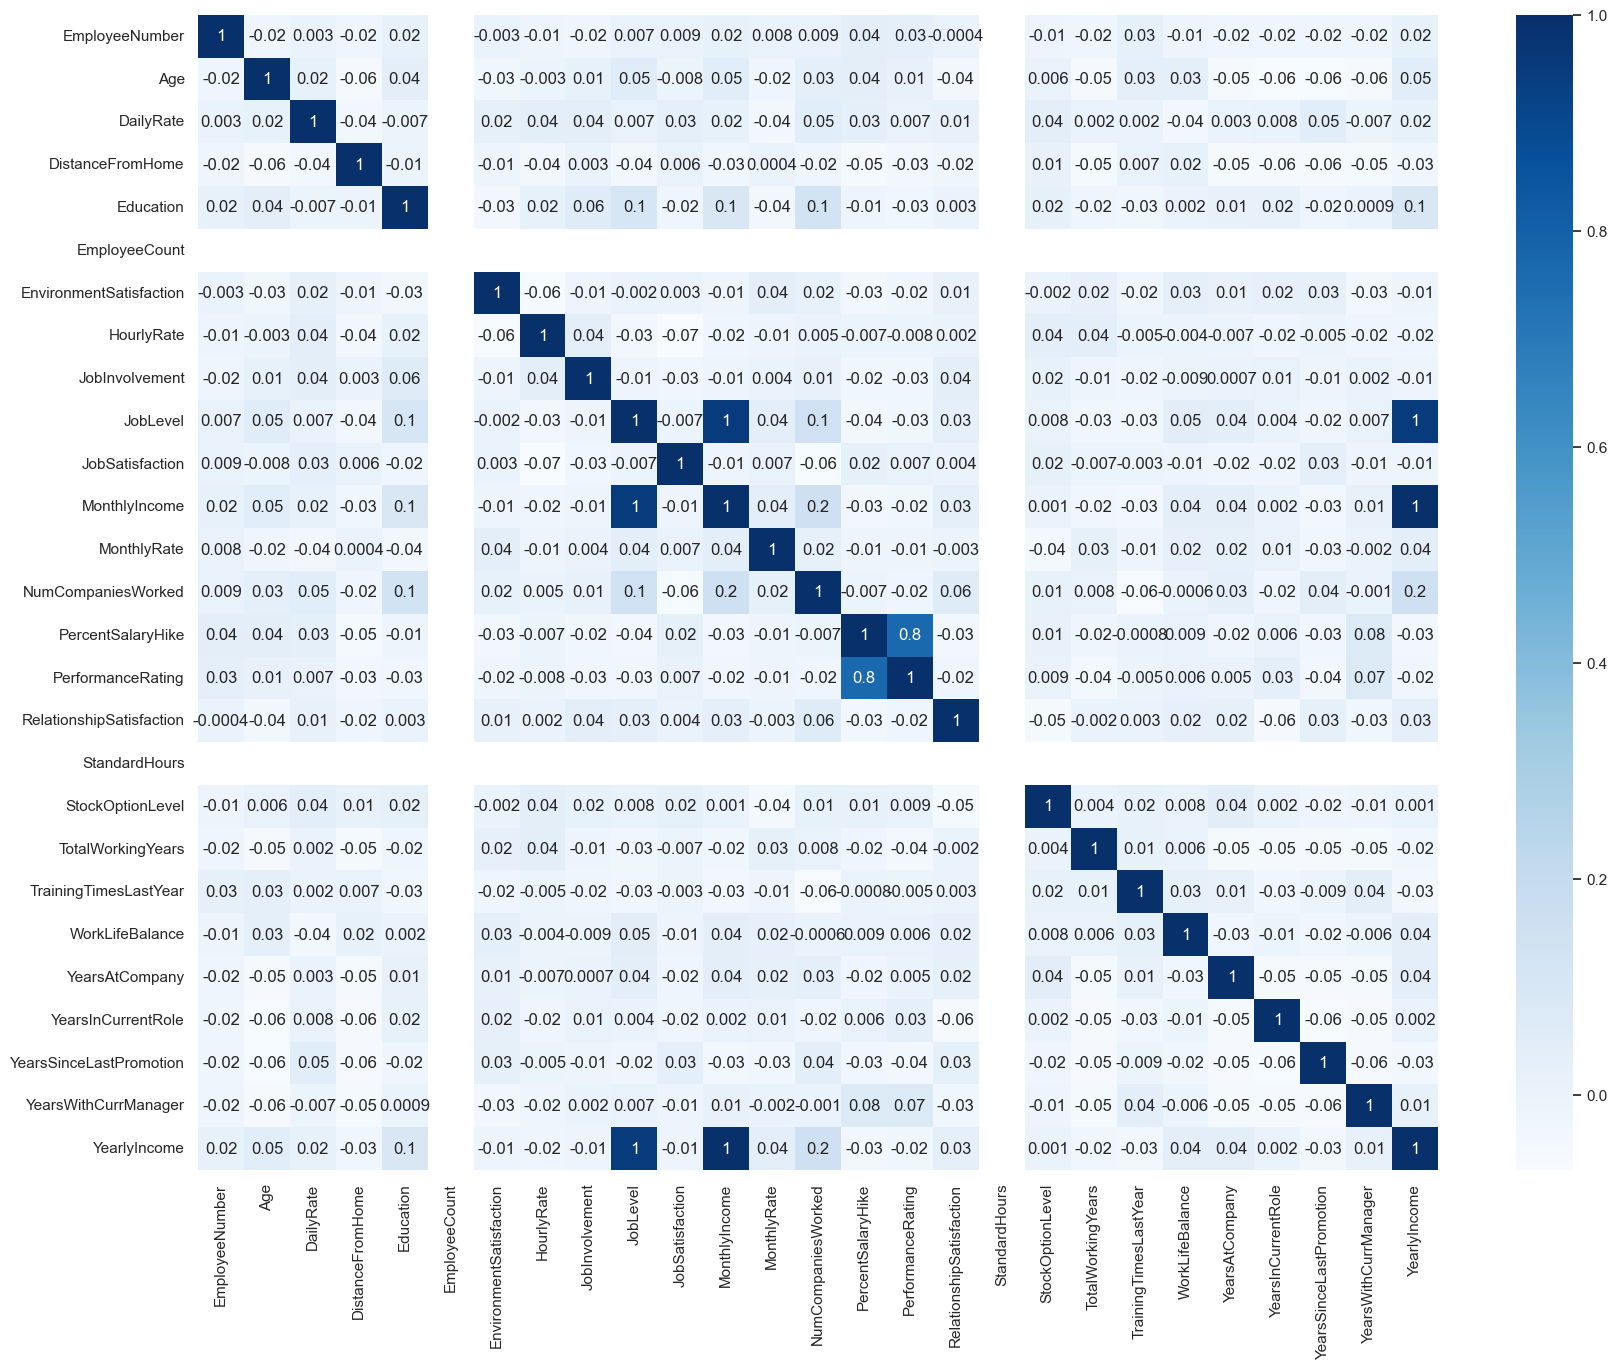

In [785]:
corr_with_heatmap(data)

In [786]:
train_df.corr(numeric_only=True)

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
EmployeeNumber,1.000000,0.164557,0.001775,0.149258,0.012982,NaN,-0.003653,0.010966,-0.004320,-0.012474,...,NaN,-0.004537,0.138199,0.014177,-0.011019,0.147271,0.148700,0.155693,0.157796,-0.005046
Age,0.164557,1.000000,0.016317,-0.057528,0.036453,NaN,-0.026857,-0.004295,0.014091,0.052980,...,NaN,0.005683,-0.056005,0.030862,0.028957,-0.054925,-0.060362,-0.061487,-0.057187,0.051017
DailyRate,0.001775,0.016317,1.000000,-0.038714,-0.006384,NaN,0.022428,0.041522,0.041827,0.011257,...,NaN,0.033094,0.002495,0.005936,-0.039579,0.003657,0.008255,0.050274,-0.006924,0.019658
DistanceFromHome,0.149258,-0.057528,-0.038714,1.000000,-0.009999,NaN,-0.013636,-0.038817,0.002743,-0.040274,...,NaN,0.011921,-0.053200,0.008211,0.015451,-0.051976,-0.057233,-0.057964,-0.053813,-0.029051
Education,0.012982,0.036453,-0.006384,-0.009999,1.000000,NaN,-0.032020,0.020450,0.060609,0.102246,...,NaN,0.023713,-0.016730,-0.026581,0.003878,0.012736,0.016508,-0.015324,0.001589,0.096832
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,-0.003653,-0.026857,0.022428,-0.013636,-0.032020,NaN,1.000000,-0.060830,-0.010691,-0.003623,...,NaN,-0.003746,0.019756,-0.018001,0.030238,0.014003,0.019469,0.027023,-0.033044,-0.013958
HourlyRate,0.010966,-0.004295,0.041522,-0.038817,0.020450,NaN,-0.060830,1.000000,0.039957,-0.035718,...,NaN,0.037639,0.042889,-0.002630,0.000400,-0.007348,-0.021139,-0.006272,-0.021233,-0.021697
JobInvolvement,-0.004320,0.014091,0.041827,0.002743,0.060609,NaN,-0.010691,0.039957,1.000000,-0.016486,...,NaN,0.015012,-0.013211,-0.024509,-0.011662,0.000095,0.009243,-0.015363,0.001659,-0.015970
JobLevel,-0.012474,0.052980,0.011257,-0.040274,0.102246,NaN,-0.003623,-0.035718,-0.016486,1.000000,...,NaN,0.009962,-0.026670,-0.034538,0.042826,0.043461,0.004149,-0.022169,0.007352,0.950583


In [787]:
train_df['EmployeeCount'].unique()

array([1.])

In [788]:
train_df['StandardHours'].unique()


array([80.])

In [789]:
# Wypisanie wszystkich unikalnych wartości z poszczególnych kolumn
for column in train_df.columns:

    unique_values = train_df[column].unique()

    print(f"Unikalne wartości dla kolumny {column}:")

    print(unique_values)

    print()

Unikalne wartości dla kolumny EmployeeNumber:
[ 104 1638  164 ... 7977 7978 7979]

Unikalne wartości dla kolumny Age:
[  30.   38.   26.   28.   35.   34.   32.   42.   40.   48.   39.   18.
   43.   21.   53.   45.   29.   33.   41.   24.   37.   50.   36.   52.
   47.   31.   49.   54.   44.   22.   46.   27.   55.   59.   25.   23.
   56.   20.   60.   51.   58.   19.   57. 8825. 3628. 6287. 9330. 1107.
 4454. 9155. 9890. 1189. 9195. 9014. 1136. 5582. 2404. 1541. 4510. 4322.
 4988. 8388. 2530. 8901. 2852. 2459. 2982. 4973. 8534. 8314. 4130. 4328.
 7952. 8699. 3147. 8889. 3871. 9531. 8167. 5257. 8136. 7390. 2993. 5672.
 5933. 5614. 5007. 3095. 9219. 6749. 4515. 6715. 1141. 8949. 3636. 4805.
 5959. 9384. 8042. 1423. 7056. 5116. 2667. 8703. 1126. 9612. 7845. 6998.
 1788. 6727. 5377. 5565. 4558. 6506. 4591. 7662. 6510. 4985. 9581. 2095.
 2275. 6399. 4935. 2698. 7617. 9661. 4834. 2242. 1915. 3226. 7924. 9529.
 8326. 1578. 8560. 9078. 6429. 9243. 2186. 2888. 6210. 3388. 2423. 6025.
 1530.

In [790]:
np.median(train_df['Age'])

36.0

# Weryfikujemy wartości odstające poprzez wykresy typu boxplot(odrzucając kolumny bez danych numerycznych

C:\Users\kzadk\AppData\Local\Temp\ipykernel_9024\4043217082.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


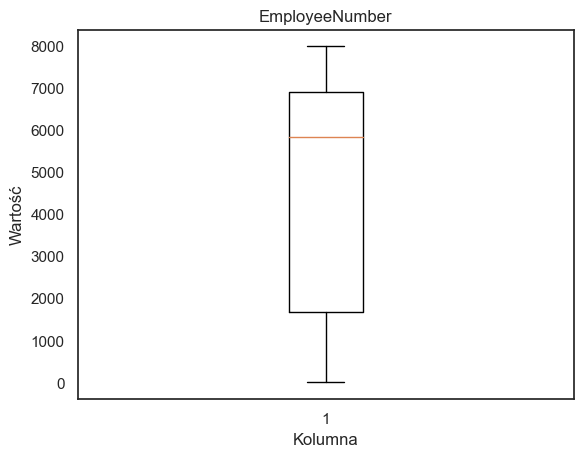

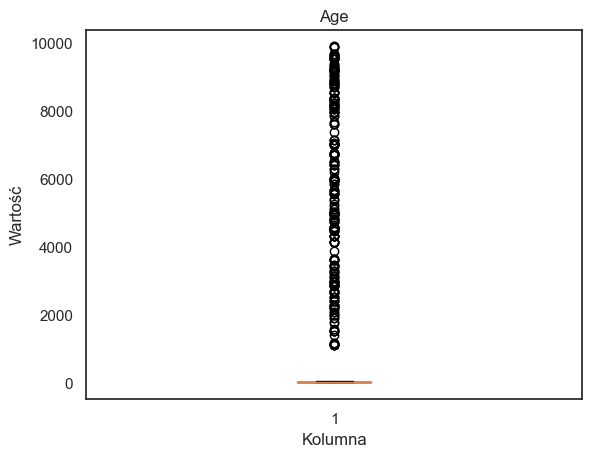

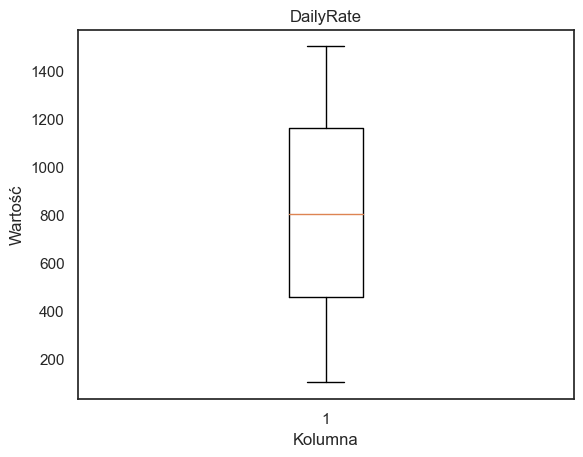

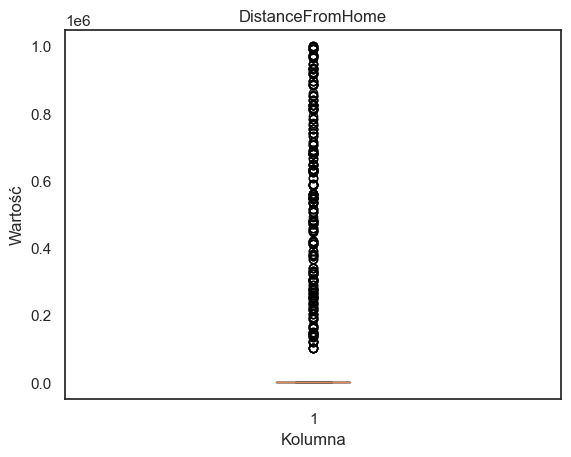

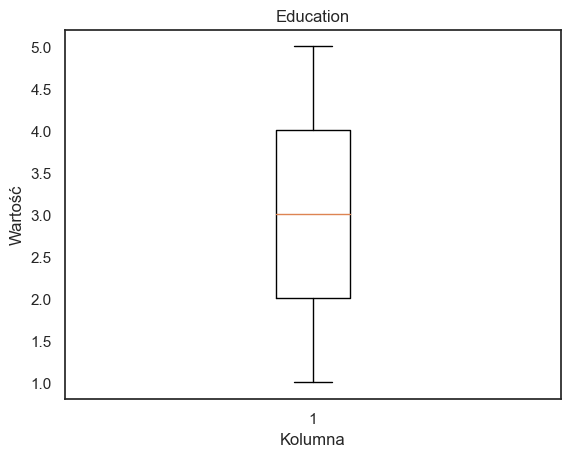

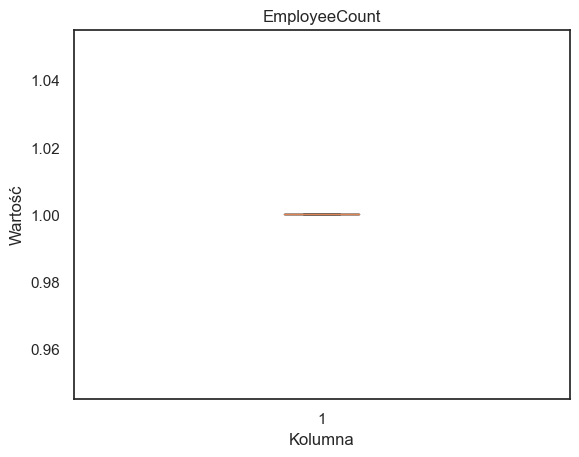

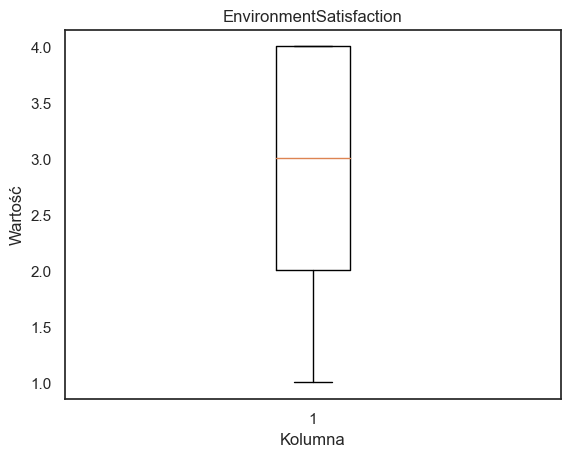

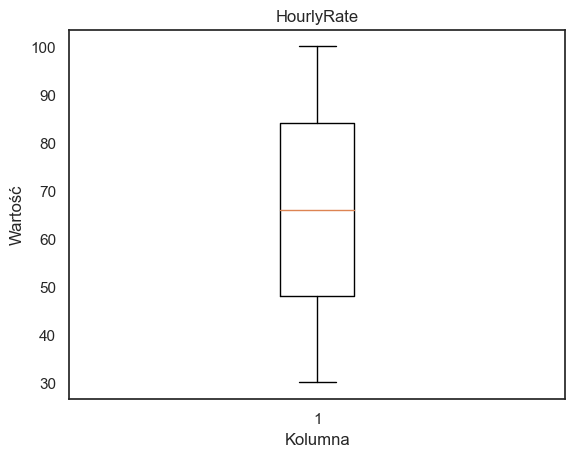

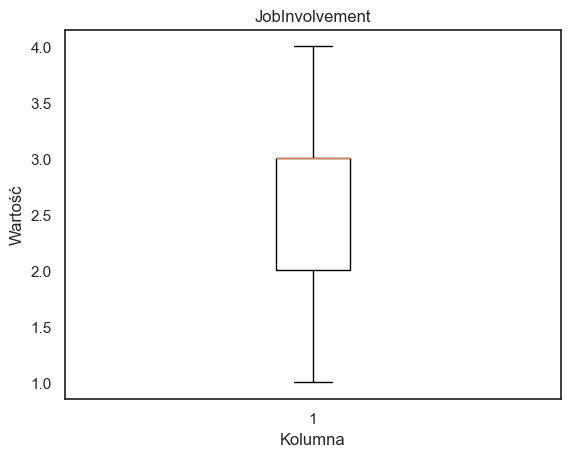

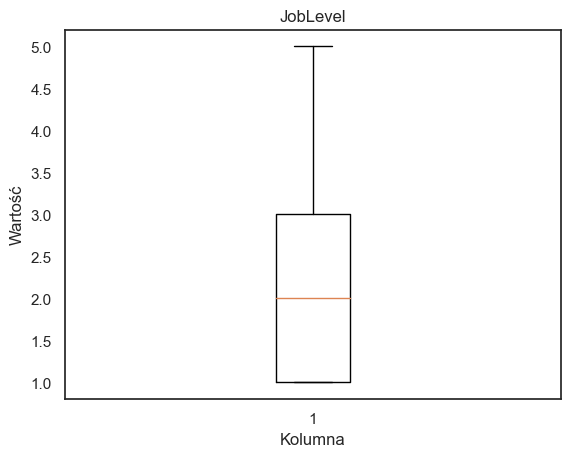

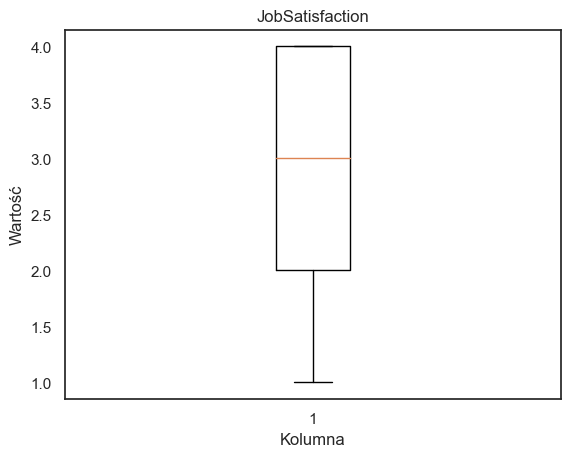

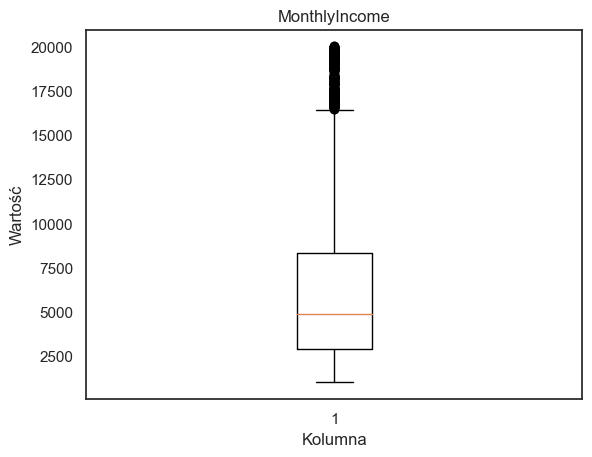

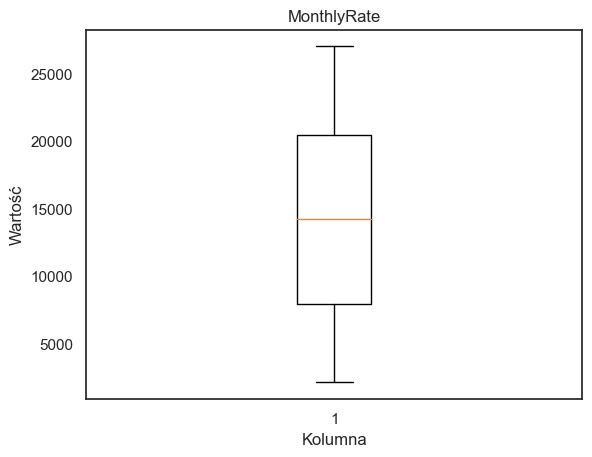

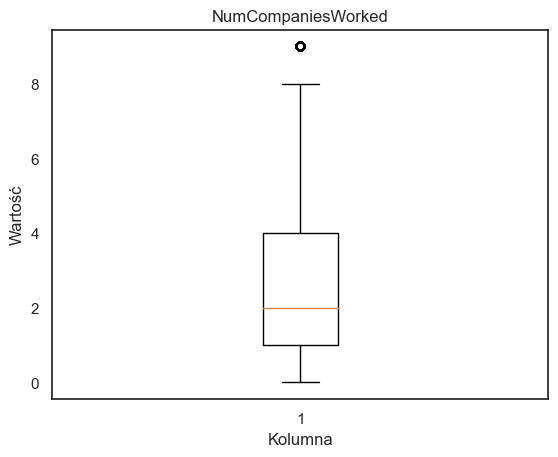

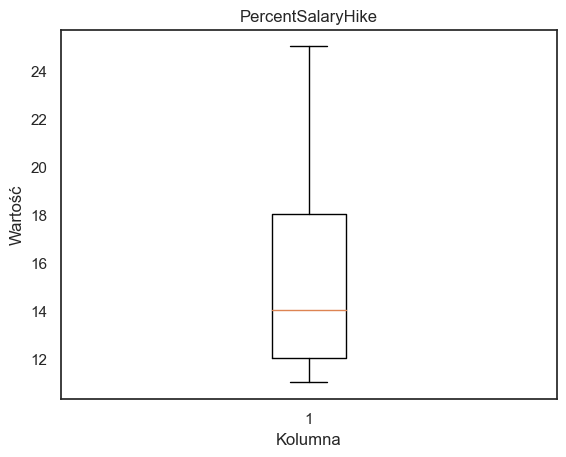

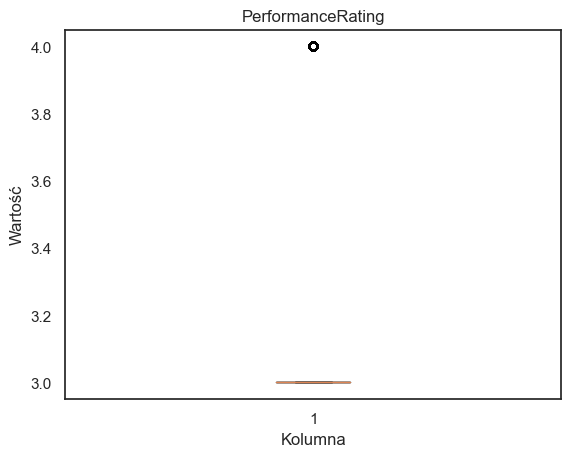

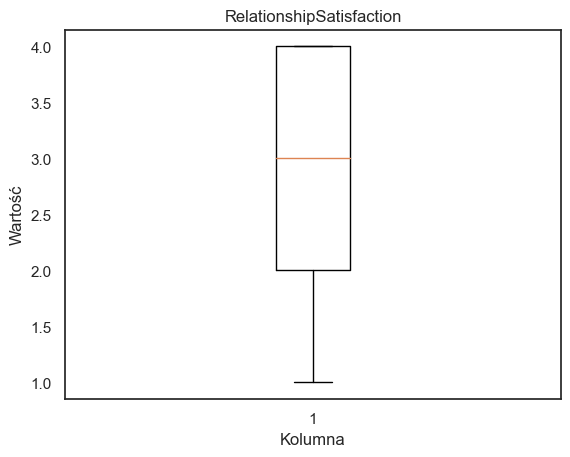

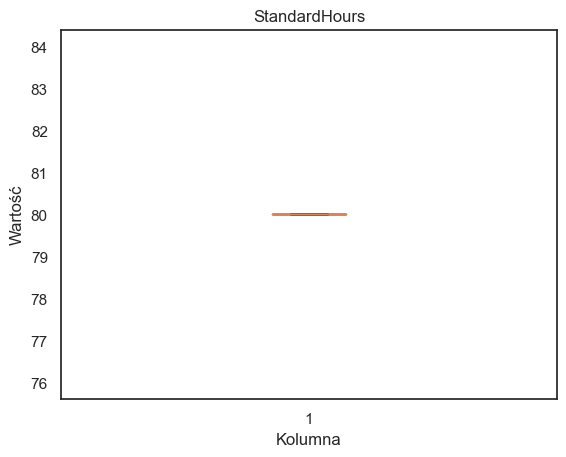

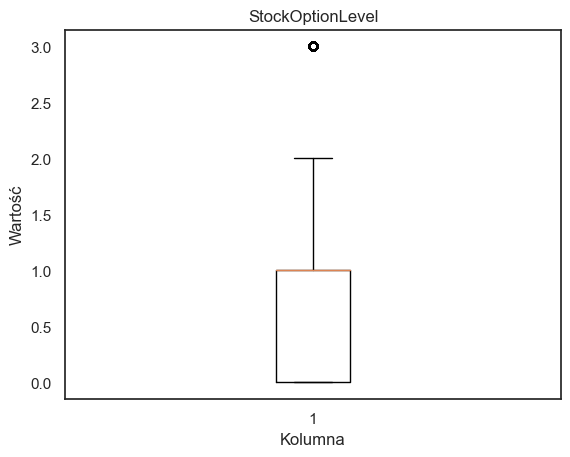

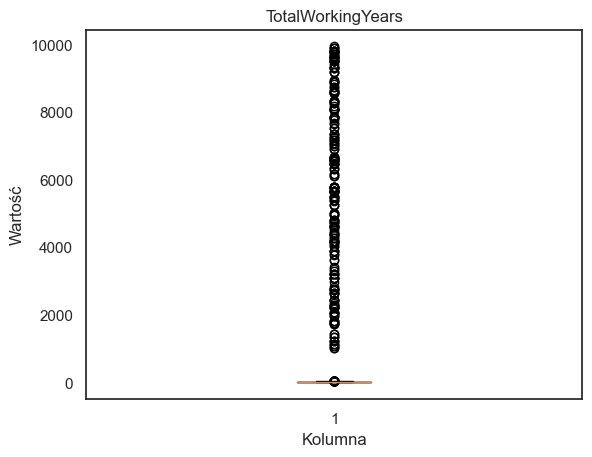

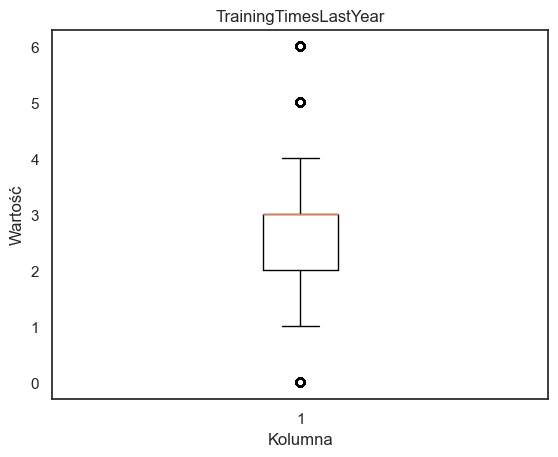

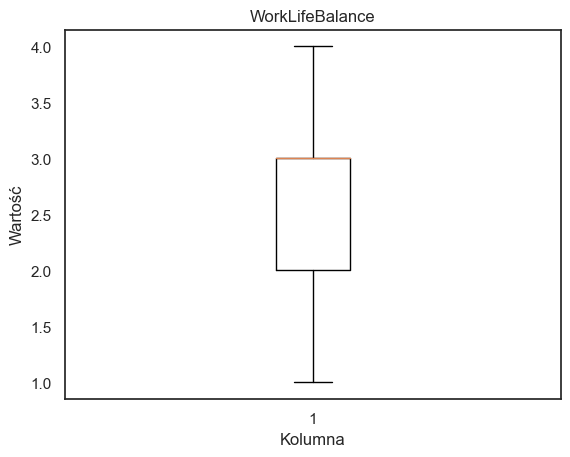

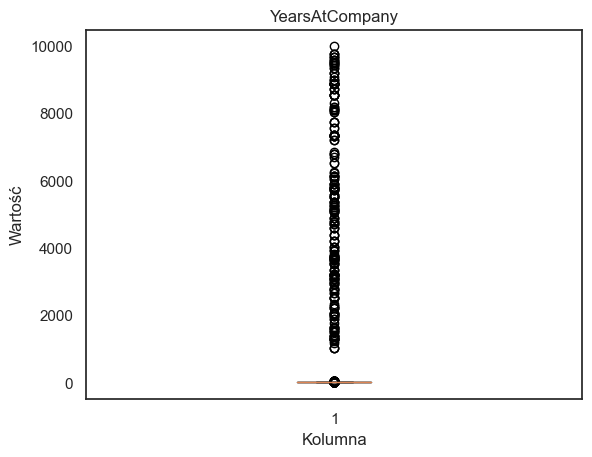

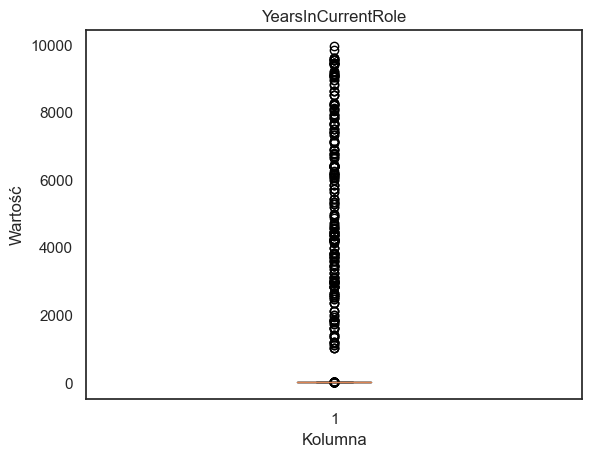

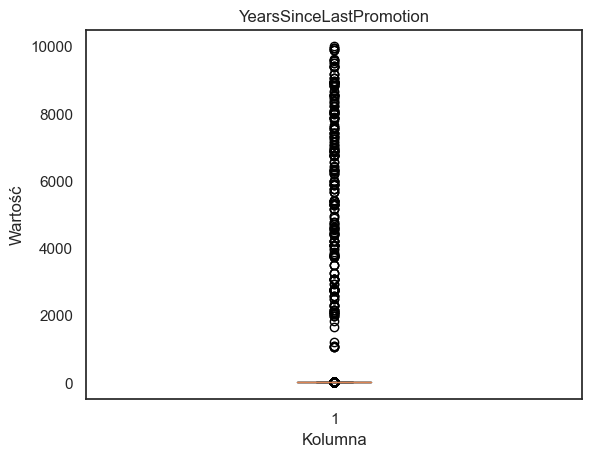

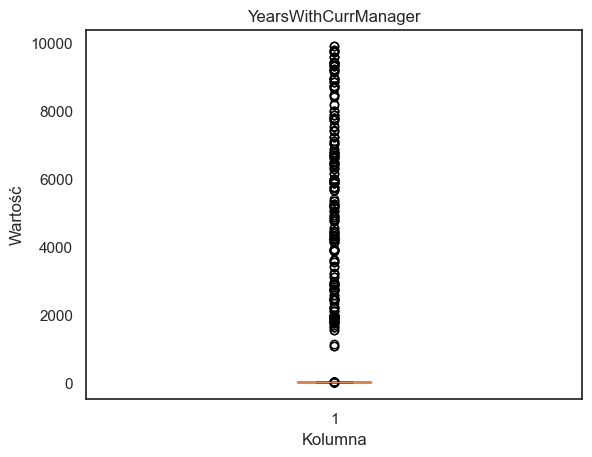

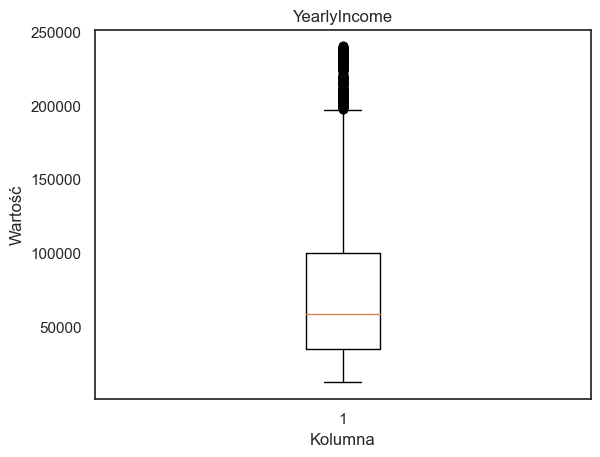

In [791]:
for column in train_df.columns:
    if(np.issubdtype(train_df[column].dtype, np.number)):
        plt.figure()
        plt.boxplot(train_df[column])
        plt.title(column)
        plt.xlabel('Kolumna')
        plt.ylabel('Wartość')

# Przeprowadzono analizę boxplotów celem ustalenia wartości odstających w zbiorach
# Zidentyfikowano wartości mało prawdopodobne dla kolumn: 'Age', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
# Z uwagi na obecność kadry zarządzającej w zbiorze danych wartości uznane za odstające dla kolumn 'MonthlyIncome' oraz 'YearlyIncome' uznano za prawdopodobne i pozostawiono bez transformacji.
# Kolumny 'EmployeeCount', 'Over18' oraz 'StandardHours' zostaną usunięte ze względu na słabą przydatność dla modelu (te same wartości).

## Sprawdzenie wpływu outliersow na zmianę wartości mediany całego zbioru na przykładzie kolumny 'Age'

In [792]:
outliers = train_df[['Age', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [793]:
copy_train_df = train_df.copy()

In [794]:
copy_train_df['Age'].describe()

count    4302.000000
mean      429.123199
std      1591.153416
min        18.000000
25%        31.000000
50%        36.000000
75%        45.000000
max      9890.000000
Name: Age, dtype: float64

In [795]:
df_with_real_age = copy_train_df.loc[copy_train_df['Age'] <= 60]

In [796]:
df_with_real_age['Age'].describe()

count    4004.000000
mean       36.750999
std         9.094430
min        18.000000
25%        30.000000
50%        35.000000
75%        42.000000
max        60.000000
Name: Age, dtype: float64

# Wniosek: wartość mediany po odrzuceniu wartości odstających nie zmieniła się znacząco względem mediany całego zbioru. Mediana całego zbioru = 36. Ponieważ udział procentowy outliersow w każdej z kolumn wymienionych w ramce 'outliers' jest podobny wartość mediany zostanie przyjęta również dla pozostałych kolumn. Z uwagi na  możliwość wystąpienia błędu logicznego('YearsAtCompany', 'YearsInCurrentRole') większe niż 'Age' po zastąpieniu outliersow medianą, w kolumnie 'Age' dla wartości odstających przyjęta zostanie wartość 60 jako górna, realna granica.

In [797]:
#Zmiana wieku outliersow na 60
train_df.loc[(copy_train_df['Age'] > 60), 'Age'] = 60
#Zmiana dla testowej ramki danych
X_test.loc[(X_test['Age'] > 60), 'Age'] = 60
print((copy_train_df['Age'] == 60).sum())

13


In [798]:
# Funkcja zmieniająca wartość outliersow w liście kolumn na ich medianę

outliers_without_age = train_df[['DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

def outliers_reduction(cols, dataframe):
    for col in cols:
        high_value = max(dataframe[dataframe[col] < 1000][col].tolist())
        med = dataframe[col].median()
        dataframe.loc[(dataframe[col] > high_value), col] = med

In [799]:
outliers_reduction(outliers_without_age, train_df)
outliers_reduction(outliers_without_age, X_test)
train_df.describe()


,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.0,4302.000000,4302.000000,4302.000000,4302.000000,...,4302.0,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000,4302.000000
mean,4809.243143,38.361460,800.843794,9.145049,2.906788,1.0,2.719665,66.036495,2.741516,2.051604,...,80.0,0.787773,11.134589,2.803347,2.765923,6.837517,4.123896,2.084612,4.048350,77439.202232
std,2643.040205,10.575169,405.655763,7.825722,1.026460,0.0,1.092333,20.298352,0.711379,1.102569,...,0.0,0.849147,7.566109,1.302586,0.708878,5.898179,3.483410,3.114389,3.478032,56075.927510
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1680.250000,31.000000,457.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34764.000000
50%,5828.500000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,6903.750000,45.000000,1162.000000,13.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,99693.000000
max,7979.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,239988.000000


In [800]:
#Ramka do X_train
train_df.drop(['EmployeeCount'], axis= 1, inplace=True)
train_df.drop(['Over18'], axis=1, inplace=True)
train_df.drop(['StandardHours'], axis=1, inplace=True)

#Testowa ramka
X_test.drop(['EmployeeCount'], axis= 1, inplace=True)
X_test.drop(['Over18'], axis=1, inplace=True)
X_test.drop(['StandardHours'], axis=1, inplace=True)

C:\Users\kzadk\AppData\Local\Temp\ipykernel_9024\4188199611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['EmployeeCount'], axis= 1, inplace=True)
C:\Users\kzadk\AppData\Local\Temp\ipykernel_9024\4188199611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['Over18'], axis=1, inplace=True)
C:\Users\kzadk\AppData\Local\Temp\ipykernel_9024\4188199611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [801]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4302 entries, 0 to 4448
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4302 non-null   int64  
 1   Age                       4302 non-null   float64
 2   BusinessTravel            4302 non-null   object 
 3   DailyRate                 4302 non-null   float64
 4   Department                4302 non-null   object 
 5   DistanceFromHome          4302 non-null   float64
 6   Education                 4302 non-null   float64
 7   EducationField            4302 non-null   object 
 8   EnvironmentSatisfaction   4302 non-null   float64
 9   Gender                    4302 non-null   object 
 10  HourlyRate                4302 non-null   float64
 11  JobInvolvement            4302 non-null   float64
 12  JobLevel                  4302 non-null   float64
 13  JobRole                   4302 non-null   object 
 14  JobSatisfacti

# Wizualizacja zależności między cechami po EDA

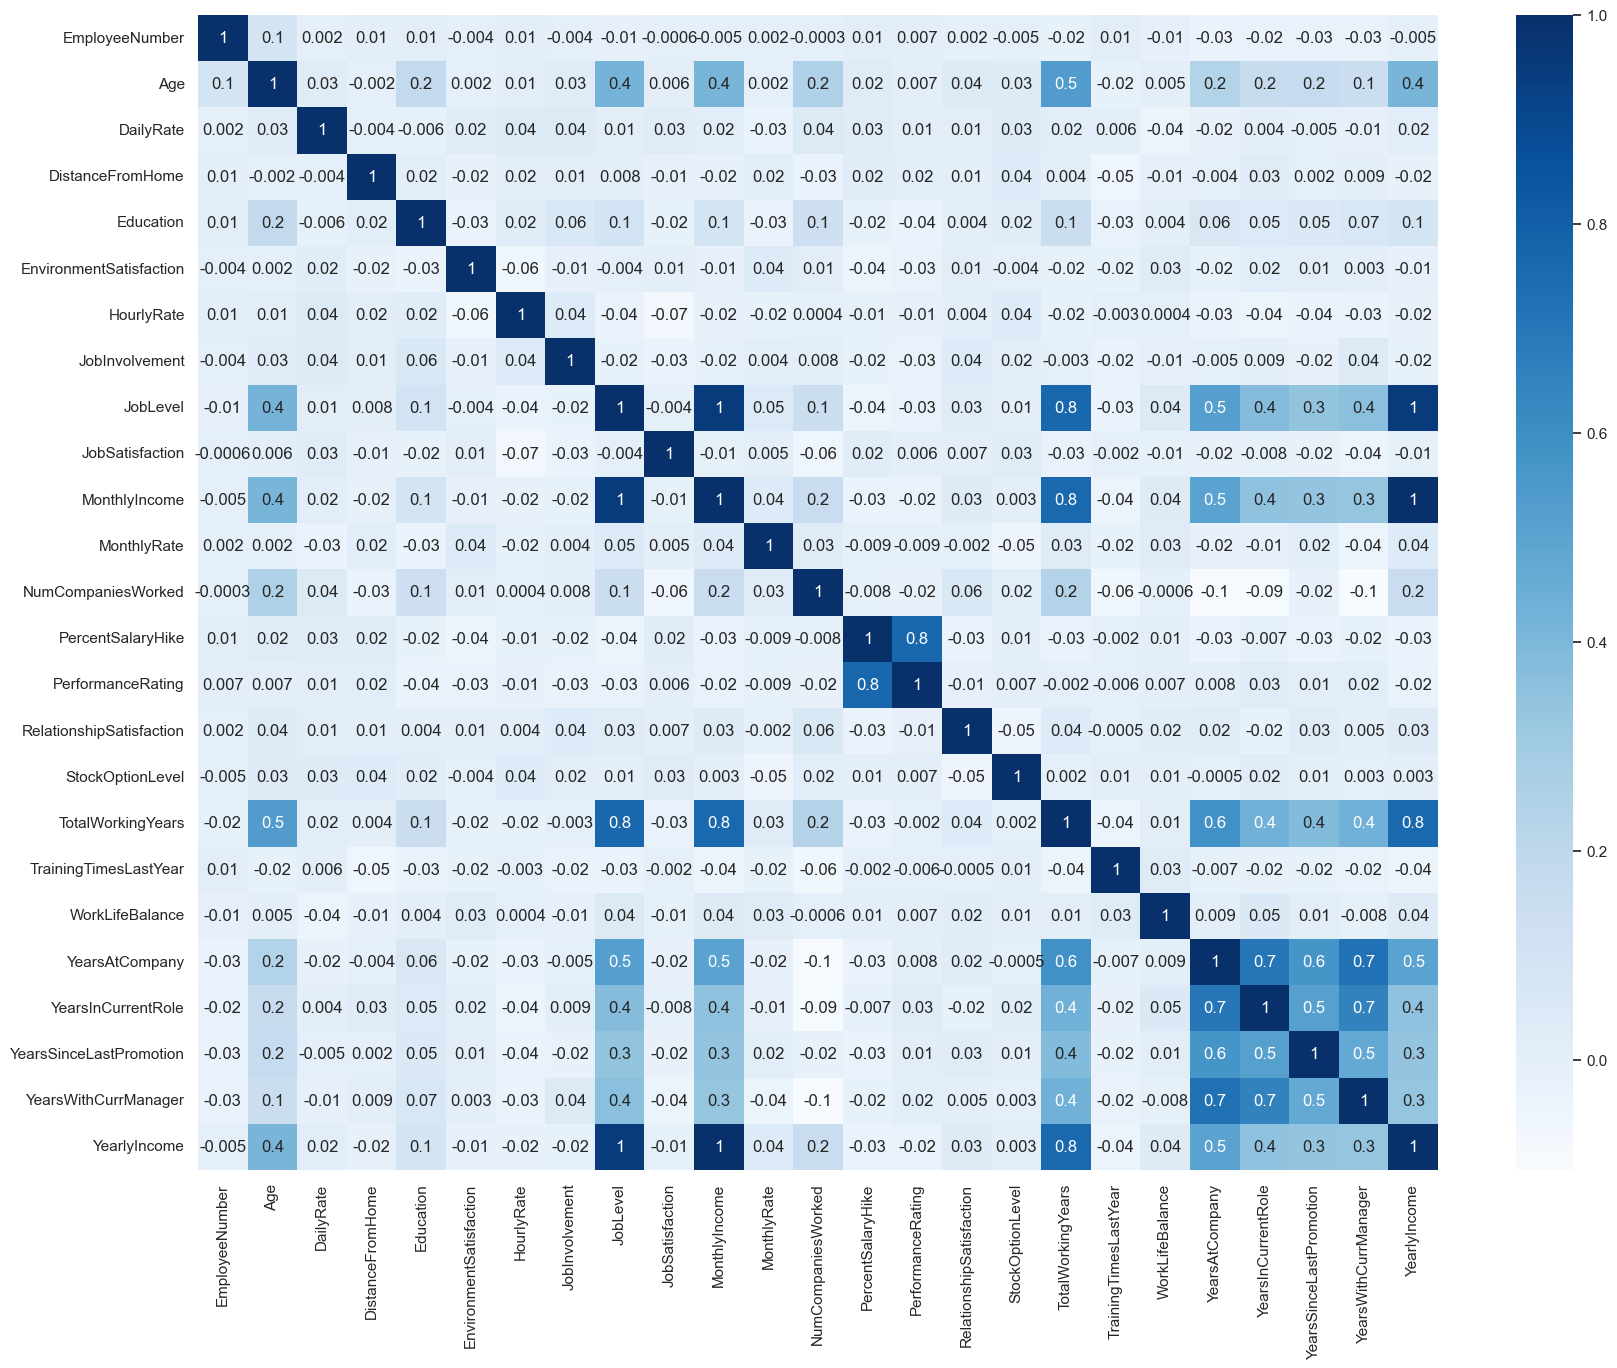

In [802]:
corr_with_heatmap(train_df)

# Feature Engineering

In [803]:
# Wypisanie wszystkich unikalnych wartości z poszczególnych kolumn
for column in train_df.columns:

    unique_values = train_df[column].unique()

    print(f"Unikalne wartości dla kolumny {column}:")

    print(unique_values)

    print()

Unikalne wartości dla kolumny EmployeeNumber:
[ 104 1638  164 ... 7977 7978 7979]

Unikalne wartości dla kolumny Age:
[30. 38. 26. 28. 35. 34. 32. 42. 40. 48. 39. 18. 43. 21. 53. 45. 29. 33.
 41. 24. 37. 50. 36. 52. 47. 31. 49. 54. 44. 22. 46. 27. 55. 59. 25. 23.
 56. 20. 60. 51. 58. 19. 57.]

Unikalne wartości dla kolumny BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Unikalne wartości dla kolumny DailyRate:
[ 852.  397.  841. 1117.  464. 1107. 1018.  269.  296.  989.  855. 1181.
  895.  827.  977.  544.  244.  995. 1343. 1282.  153.  280.  404. 1265.
  252. 1496.  306.  128.  529.  553.  572.  482.  471.  509.  130.  506.
  329.  367. 1219.  746. 1322.  969. 1271. 1158.  688.  319.  371. 1336.
  107.  448.  359.  625. 1017.  835. 1050.  523. 1064. 1128.  928. 1319.
  932.  809. 1376.  253.  336.  884. 1385.  945.  118. 1231.  426.  737.
 1442.  853.  557.  377.  616. 1398. 1138.  531.  138. 1377. 1240. 1400.
 1001. 1082. 1171.  136.  218.  452. 1397. 1192.  944. 

### Dyskretyzacja danych

<Axes: >

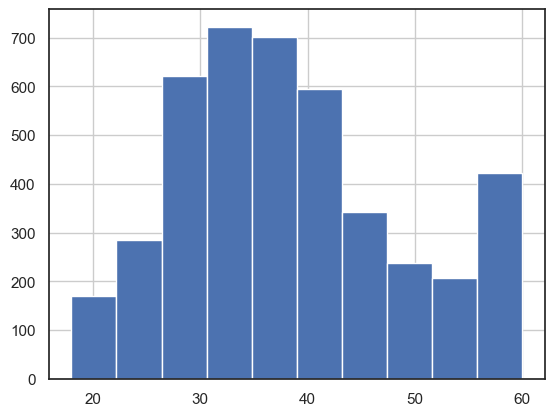

In [804]:
train_df['Age'].hist()

In [805]:
# Binning wieku train i test
train_df['Age_Bin'] = pd.cut(train_df.Age, labels=['17-30', '31-45', '46-70'], bins=[17, 30, 45, 70])
# Ramka do testu
X_test['Age_Bin'] = pd.cut(X_test.Age, labels=['17-30', '31-45', '46-70'], bins=[17, 30, 45, 70])

C:\Users\kzadk\AppData\Local\Temp\ipykernel_9024\1711943289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age_Bin'] = pd.cut(train_df.Age, labels=['17-30', '31-45', '46-70'], bins=[17, 30, 45, 70])
C:\Users\kzadk\AppData\Local\Temp\ipykernel_9024\1711943289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age_Bin'] = pd.cut(X_test.Age, labels=['17-30', '31-45', '46-70'], bins=[17, 30, 45, 70])


In [806]:
train_df.head()

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,Age_Bin
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,4.0,Male,...,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,17-30
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,4.0,Female,...,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,31-45
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,3.0,Female,...,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,17-30
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,4.0,Female,...,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,17-30
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,3.0,Male,...,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,31-45


In [807]:
unique_age_bin = tuple(train_df.Age_Bin.unique())
#Ramka do train
train_df['Age_Bin'].replace(unique_age_bin, range(len(unique_age_bin)), inplace=True)
train_df.drop('Age', axis=1, inplace=True)
#Ramka do testu
X_test['Age_Bin'].replace(unique_age_bin, range(len(unique_age_bin)), inplace=True)
X_test.drop('Age', axis=1, inplace=True)

C:\Users\kzadk\AppData\Local\Temp\ipykernel_9024\407017564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Age_Bin'].replace(unique_age_bin, range(len(unique_age_bin)), inplace=True)
C:\Users\kzadk\AppData\Local\Temp\ipykernel_9024\407017564.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop('Age', axis=1, inplace=True)
C:\Users\kzadk\AppData\Local\Temp\ipykernel_9024\407017564.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [808]:
train_df.head()

,EmployeeNumber,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,Age_Bin
0,104,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,...,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0,0
1,1638,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,...,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0,1
2,164,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,3.0,Female,46.0,...,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0,0
3,395,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,...,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0,0
4,53,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,3.0,Male,75.0,...,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0,1


In [809]:
#Zamiana danych z dwoma wartościami unikalnymi
encoder = LabelEncoder()
train_df['Attrition'] = encoder.fit_transform(train_df['Attrition'])
train_df['Gender'] = encoder.fit_transform(train_df['Gender'])
train_df['OverTime'] = encoder.fit_transform(train_df['OverTime'])
#Ramka do testu
X_test['Attrition'] = encoder.fit_transform(X_test['Attrition'])
X_test['Gender'] = encoder.fit_transform(X_test['Gender'])
X_test['OverTime'] = encoder.fit_transform(X_test['OverTime'])

C:\Users\kzadk\AppData\Local\Temp\ipykernel_9024\3130058870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Attrition'] = encoder.fit_transform(train_df['Attrition'])
C:\Users\kzadk\AppData\Local\Temp\ipykernel_9024\3130058870.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Gender'] = encoder.fit_transform(train_df['Gender'])
C:\Users\kzadk\AppData\Local\Temp\ipykernel_9024\3130058870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [810]:
train_df.head()

,EmployeeNumber,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,Age_Bin
0,104,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,4.0,1,55.0,...,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0,61512.0,0
1,1638,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,4.0,0,54.0,...,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,93072.0,1
2,164,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,3.0,0,46.0,...,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0,28416.0,0
3,395,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,4.0,0,66.0,...,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0,39720.0,0
4,53,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,3.0,1,75.0,...,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0,23412.0,1


In [811]:
# Zamiana kolumn z więcej niż dwiema wartościami kategorycznymi
# Ramka do train
unique_travels = tuple(train_df.BusinessTravel.unique())
train_df['BusinessTravel'].replace(unique_travels, range(len(unique_travels)), inplace=True)

unique_department = tuple(train_df.Department.unique())
train_df['Department'].replace(unique_department, range(len(unique_department)), inplace=True)

unique_education_field = tuple(train_df.EducationField.unique())
train_df['EducationField'].replace(unique_education_field, range(len(unique_education_field)), inplace=True)

unique_job_role = tuple(train_df.JobRole.unique())
train_df['JobRole'].replace(unique_job_role, range(len(unique_job_role)), inplace=True)

unique_marital_status = tuple(train_df.MaritalStatus.unique())
train_df['MaritalStatus'].replace(unique_marital_status, range(len(unique_marital_status)), inplace=True)

#Ramka do train
unique_travels = tuple(X_test.BusinessTravel.unique())
X_test['BusinessTravel'].replace(unique_travels, range(len(unique_travels)), inplace=True)

unique_department = tuple(X_test.Department.unique())
X_test['Department'].replace(unique_department, range(len(unique_department)), inplace=True)

unique_education_field = tuple(X_test.EducationField.unique())
X_test['EducationField'].replace(unique_education_field, range(len(unique_education_field)), inplace=True)

unique_job_role = tuple(X_test.JobRole.unique())
X_test['JobRole'].replace(unique_job_role, range(len(unique_job_role)), inplace=True)

unique_marital_status = tuple(X_test.MaritalStatus.unique())
X_test['MaritalStatus'].replace(unique_marital_status, range(len(unique_marital_status)), inplace=True)

C:\Users\kzadk\AppData\Local\Temp\ipykernel_9024\1779939639.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['BusinessTravel'].replace(unique_travels, range(len(unique_travels)), inplace=True)
C:\Users\kzadk\AppData\Local\Temp\ipykernel_9024\1779939639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Department'].replace(unique_department, range(len(unique_department)), inplace=True)
C:\Users\kzadk\AppData\Local\Temp\ipykernel_9024\1779939639.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

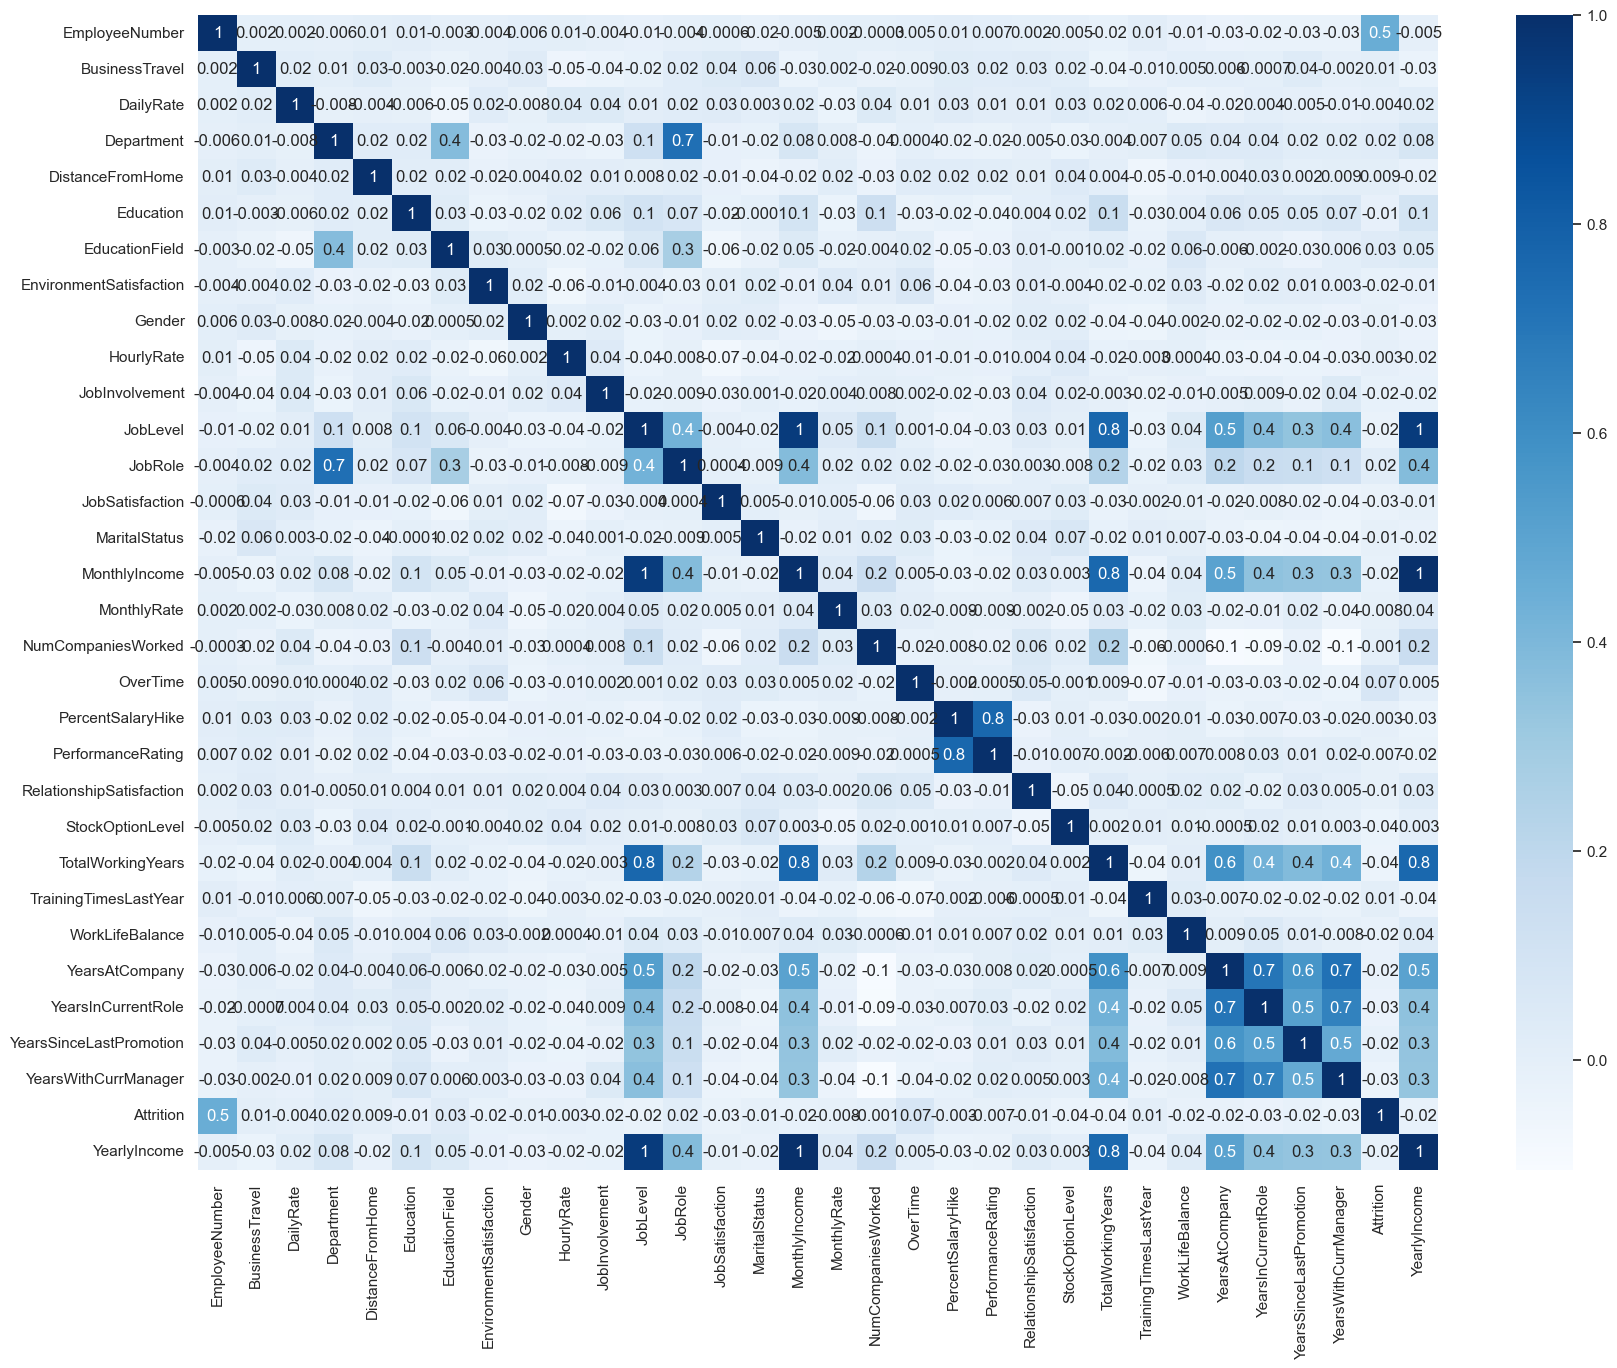

In [812]:
corr_with_heatmap(train_df)

### Na podstawie macierzy korelacji ustalono znaczącą zależność dla: 'JobLevel': 'YearlyIncome', 'TotalWorkingYears', 'MonthlyIncome' oraz zależność między 'PerformanceRating' a 'PercentSalaryHike'. W związku z tym do modelu użyte zostaną cechy: 'JobLevel' oraz 'PercentSalaryHike', pozostałe kolumny zostaną usunięte.

<Axes: >

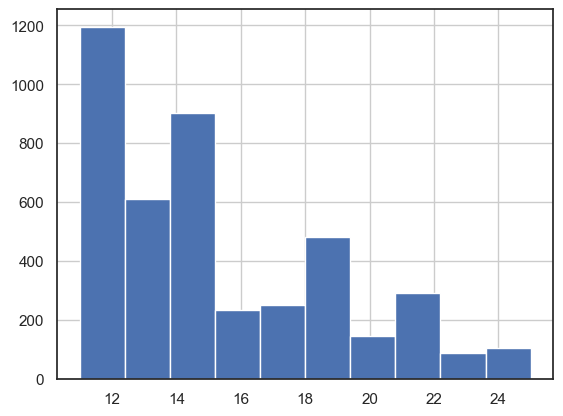

In [813]:
train_df['PercentSalaryHike'].hist()

In [814]:
copy = train_df.corr(numeric_only=True)

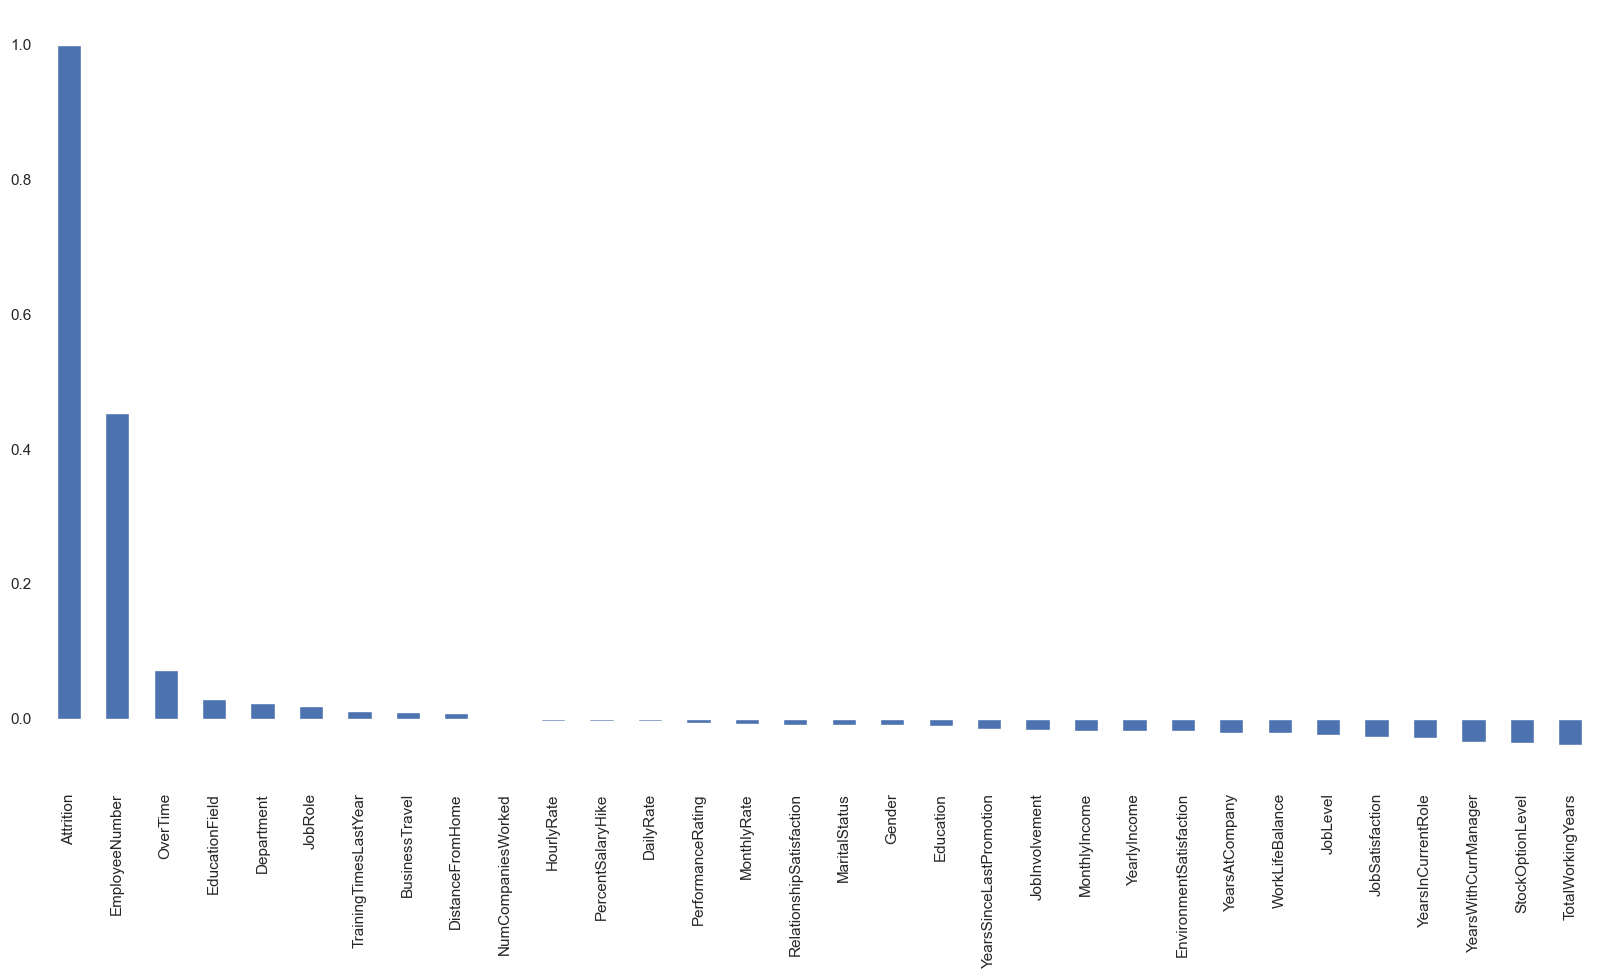

In [815]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
plt.figure(figsize=(20,10))
copy['Attrition'].sort_values(ascending = False).plot(kind='bar');

In [816]:
data_for_model = train_df.copy()
#Ramka do train
data_for_model.drop(['YearlyIncome', 'TotalWorkingYears', 'MonthlyIncome', 'PerformanceRating'], axis= 1)
#Ramka do test
X_test.drop(['YearlyIncome', 'TotalWorkingYears', 'MonthlyIncome', 'PerformanceRating'], axis= 1)

,EmployeeNumber,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,Age_Bin
1323,100000,0,1343.0,0,27.0,1.0,0,3.0,0,53.0,...,4.0,0.0,3.0,2.0,6.0,5.0,1.0,1.0,0,1
1324,100001,0,1220.0,0,5.0,3.0,1,3.0,0,85.0,...,2.0,0.0,2.0,2.0,4.0,3.0,1.0,2.0,0,0
1325,100002,0,1476.0,1,4.0,1.0,0,4.0,0,42.0,...,3.0,2.0,3.0,3.0,5.0,4.0,0.0,3.0,0,0
1326,100003,1,142.0,1,9.0,4.0,0,1.0,1,69.0,...,4.0,1.0,6.0,3.0,9.0,5.0,7.0,7.0,0,1
1327,100004,0,527.0,0,1.0,4.0,2,4.0,1,63.0,...,3.0,0.0,2.0,2.0,10.0,9.0,7.0,8.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,100142,1,208.0,0,8.0,4.0,1,3.0,0,52.0,...,4.0,1.0,5.0,3.0,14.0,11.0,2.0,9.0,0,1
1466,100143,0,582.0,0,28.0,4.0,1,1.0,0,60.0,...,3.0,1.0,3.0,3.0,20.0,7.0,0.0,10.0,0,1
1467,100144,0,1396.0,0,6.0,3.0,0,3.0,1,83.0,...,2.0,1.0,3.0,4.0,13.0,7.0,5.0,7.0,0,1
1468,100145,0,621.0,0,15.0,3.0,0,1.0,0,73.0,...,4.0,1.0,2.0,3.0,10.0,7.0,0.0,5.0,0,1


In [817]:
numbers_for_test = pd.read_csv('test_target.csv')

y_train = data_for_model.pop('Attrition')
X_train = data_for_model
y_test = numbers_for_test['Attrition']



In [818]:
X_train.isnull()

,EmployeeNumber,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome,Age_Bin
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4445,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4446,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4447,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [819]:


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe.fit(X_train, y_train)
pipe.named_steps['classifier'].get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 1},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}